In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score

In [15]:
data=pd.read_csv('sonar.csv',header=None)
data.head(10)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [16]:
data[60].unique()

array(['R', 'M'], dtype=object)

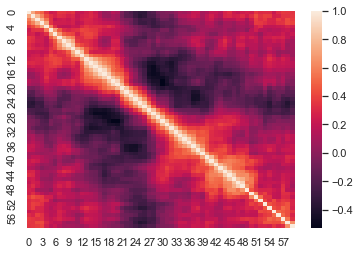

In [17]:
sns.set()
sns.heatmap(data.corr())
plt.show()

In [18]:
#sns.pairplot(data['R',1,2,3])
#plt.show()
data[60]=[1 if (k=='M') else 0 for k in data[60]]

In [19]:
g=data.corr()
h=np.correlate(data[60],data[1])
print(g.shape)
g_relevant=abs(g.iloc[60])
#g

(61, 61)


In [20]:
g_relevant

0     0.271694
1     0.231238
2     0.192195
3     0.250638
4     0.222232
        ...   
56    0.000933
57    0.184191
58    0.130826
59    0.090055
60    1.000000
Name: 60, Length: 61, dtype: float64

In [21]:
g_relevant.sum()

11.19160753040769

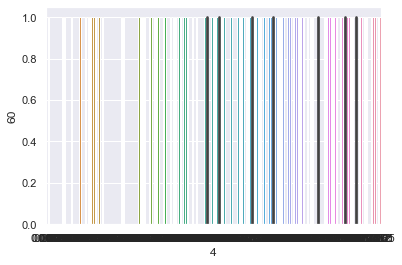

In [22]:
sns.barplot(data[4],data[60])
plt.show()

In [23]:
y=data[60]
x=data.drop(columns=60,axis=1)
print(y.head(5))
print(x.head(5))

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      50      51      52      53      54      55      56  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0

In [24]:
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [25]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25)
for k in range(1,15):
    logistic_reg_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=k)),('Logistic_Regression',LogisticRegression())])
    logistic_reg_pipeline.fit(X_train,y_train)
    print("for decomposition in ",k,'components logistic regression gives a score of',logistic_reg_pipeline.score(X_train,y_train),'on training data')
    print("for decomposition in ",k,'components logistic regression gives a score of',logistic_reg_pipeline.score(X_test,y_test),'on test data')


for decomposition in  1 components logistic regression gives a score of 0.5833333333333334 on training data
for decomposition in  1 components logistic regression gives a score of 0.40384615384615385 on test data
for decomposition in  2 components logistic regression gives a score of 0.6089743589743589 on training data
for decomposition in  2 components logistic regression gives a score of 0.5192307692307693 on test data
for decomposition in  3 components logistic regression gives a score of 0.7756410256410257 on training data
for decomposition in  3 components logistic regression gives a score of 0.7307692307692307 on test data
for decomposition in  4 components logistic regression gives a score of 0.782051282051282 on training data
for decomposition in  4 components logistic regression gives a score of 0.7307692307692307 on test data
for decomposition in  5 components logistic regression gives a score of 0.782051282051282 on training data
for decomposition in  5 components logistic r

In [26]:
for k in range(1,15):
    logistic_reg_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=k)),('Logistic_Regression',LogisticRegression())])
    logistic_reg_pipeline.fit(X_train,y_train)
    print("for decomposition in ",k,'components logistic regression gives a F1 score of',f1_score(y_train,logistic_reg_pipeline.predict(X_train)),'on training data')
    print("for decomposition in ",k,'components logistic regression gives a F1 score of',f1_score(y_test,logistic_reg_pipeline.predict(X_test)),'on test data')


for decomposition in  1 components logistic regression gives a F1 score of 0.6012269938650308 on training data
for decomposition in  1 components logistic regression gives a F1 score of 0.47457627118644063 on test data
for decomposition in  2 components logistic regression gives a F1 score of 0.6303030303030304 on training data
for decomposition in  2 components logistic regression gives a F1 score of 0.5762711864406779 on test data
for decomposition in  3 components logistic regression gives a F1 score of 0.7798742138364778 on training data
for decomposition in  3 components logistic regression gives a F1 score of 0.7307692307692307 on test data
for decomposition in  4 components logistic regression gives a F1 score of 0.7848101265822784 on training data
for decomposition in  4 components logistic regression gives a F1 score of 0.7307692307692307 on test data
for decomposition in  5 components logistic regression gives a F1 score of 0.7926829268292682 on training data
for decompositio

In [27]:
from sklearn.metrics import confusion_matrix,f1_score
logistic_reg_optimised_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=8)),('Logistic_Regression',LogisticRegression())])
logistic_reg_optimised_pipeline.fit(X_train,y_train)
print(confusion_matrix(y_test,logistic_reg_optimised_pipeline.predict(X_test)))
print(f1_score(y_test,logistic_reg_optimised_pipeline.predict(X_test)))

[[18  6]
 [ 9 19]]
0.7169811320754718


let us see if random forest can do better than logistic regression

In [28]:
for k in range(1,15):
    random_forest_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=k)),('Random Forest',RandomForestClassifier())])
    random_forest_pipeline.fit(X_train,y_train)
    print("for decomposition in ",k,'components random forest gives a score of',random_forest_pipeline.score(X_train,y_train),'on training data')
    print("for decomposition in ",k,'components random forest gives a score of',random_forest_pipeline.score(X_test,y_test),'on test data')


for decomposition in  1 components random forest gives a score of 1.0 on training data
for decomposition in  1 components random forest gives a score of 0.4807692307692308 on test data
for decomposition in  2 components random forest gives a score of 1.0 on training data
for decomposition in  2 components random forest gives a score of 0.6730769230769231 on test data
for decomposition in  3 components random forest gives a score of 1.0 on training data
for decomposition in  3 components random forest gives a score of 0.7884615384615384 on test data
for decomposition in  4 components random forest gives a score of 1.0 on training data
for decomposition in  4 components random forest gives a score of 0.9038461538461539 on test data
for decomposition in  5 components random forest gives a score of 1.0 on training data
for decomposition in  5 components random forest gives a score of 0.8653846153846154 on test data
for decomposition in  6 components random forest gives a score of 1.0 on tr

In [29]:
for k in range(1,15):
    random_forest_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=k)),('Logistic_Regression',LogisticRegression())])
    random_forest_pipeline.fit(X_train,y_train)
    print("for decomposition in ",k,'components logistic regression gives a F1 score of',f1_score(y_train,random_forest_pipeline.predict(X_train)),'on training data')
    print("for decomposition in ",k,'components logistic regression gives a F1 score of',f1_score(y_test,random_forest_pipeline.predict(X_test)),'on test data')


for decomposition in  1 components logistic regression gives a F1 score of 0.6012269938650308 on training data
for decomposition in  1 components logistic regression gives a F1 score of 0.47457627118644063 on test data
for decomposition in  2 components logistic regression gives a F1 score of 0.6303030303030304 on training data
for decomposition in  2 components logistic regression gives a F1 score of 0.5762711864406779 on test data
for decomposition in  3 components logistic regression gives a F1 score of 0.7798742138364778 on training data
for decomposition in  3 components logistic regression gives a F1 score of 0.7307692307692307 on test data
for decomposition in  4 components logistic regression gives a F1 score of 0.7848101265822784 on training data
for decomposition in  4 components logistic regression gives a F1 score of 0.7307692307692307 on test data
for decomposition in  5 components logistic regression gives a F1 score of 0.7926829268292682 on training data
for decompositio

In [30]:

random_forest_optimised_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=11)),('Logistic_Regression',LogisticRegression())])
random_forest_optimised_pipeline.fit(X_train,y_train)
print(confusion_matrix(y_test,random_forest_optimised_pipeline.predict(X_test)))
print(f1_score(y_test,random_forest_optimised_pipeline.predict(X_test)))

[[16  8]
 [ 4 24]]
0.7999999999999999


In [31]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [32]:
for k in range(1,15):
    gaussian_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=k)),('Gaussian Process',GaussianProcessClassifier())])
    gaussian_pipeline.fit(X_train,y_train)
    print("for decomposition in ",k,'components Gaussian process gives a score of',gaussian_pipeline.score(X_train,y_train),'on training data')
    print("for decomposition in ",k,'components Gaussian process gives a score of',gaussian_pipeline.score(X_test,y_test),'on test data')


for decomposition in  1 components Gaussian process gives a score of 0.6217948717948718 on training data
for decomposition in  1 components Gaussian process gives a score of 0.4230769230769231 on test data
for decomposition in  2 components Gaussian process gives a score of 0.7435897435897436 on training data
for decomposition in  2 components Gaussian process gives a score of 0.5769230769230769 on test data
for decomposition in  3 components Gaussian process gives a score of 0.9294871794871795 on training data
for decomposition in  3 components Gaussian process gives a score of 0.7692307692307693 on test data
for decomposition in  4 components Gaussian process gives a score of 0.9871794871794872 on training data
for decomposition in  4 components Gaussian process gives a score of 0.8653846153846154 on test data
for decomposition in  5 components Gaussian process gives a score of 1.0 on training data
for decomposition in  5 components Gaussian process gives a score of 0.884615384615384

In [33]:
for k in range(1,15):
    gaussian_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=k)),('Gaussian Process',GaussianProcessClassifier())])
    gaussian_pipeline.fit(X_train,y_train)
    print("for decomposition in ",k,'components Gaussian process gives a F1 score of',f1_score(y_train,gaussian_pipeline.predict(X_train)),'on training data')
    print("for decomposition in ",k,'components Gaussian process gives a F1 score of',f1_score(y_test,gaussian_pipeline.predict(X_test)),'on test data')


for decomposition in  1 components Gaussian process gives a F1 score of 0.7035175879396985 on training data
for decomposition in  1 components Gaussian process gives a F1 score of 0.5714285714285714 on test data
for decomposition in  2 components Gaussian process gives a F1 score of 0.7727272727272727 on training data
for decomposition in  2 components Gaussian process gives a F1 score of 0.6857142857142857 on test data
for decomposition in  3 components Gaussian process gives a F1 score of 0.930817610062893 on training data
for decomposition in  3 components Gaussian process gives a F1 score of 0.7692307692307692 on test data
for decomposition in  4 components Gaussian process gives a F1 score of 0.9878048780487805 on training data
for decomposition in  4 components Gaussian process gives a F1 score of 0.8727272727272727 on test data
for decomposition in  5 components Gaussian process gives a F1 score of 1.0 on training data
for decomposition in  5 components Gaussian process gives a 

This does not surpass the performance of random forest so we consider random forest as our final model.

In [34]:
from sklearn.externals import joblib
joblib.dump(random_forest_optimised_pipeline,'RFOP.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['RFOP.pkl']